<a href="https://www.bigdatauniversity.com"><img src="https://ibm.box.com/shared/static/cw2c7r3o20w9zn8gkecaeyjhgw3xdgbj.png" width="400" align="center"></a>

<h1 align="center"><font size="5">Classification with Python</font></h1>

In this notebook we try to practice all the classification algorithms that we learned in this course.

We load a dataset using Pandas library, and apply the following algorithms, and find the best one for this specific dataset by accuracy evaluation methods.

Lets first load required libraries:

In [1]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline
# Random seed for similar result on each time
np.random.seed(9)

### About dataset

This dataset is about past loans. The __Loan_train.csv__ data set includes details of 346 customers whose loan are already paid off or defaulted. It includes following fields:

| Field          | Description                                                                           |
|----------------|---------------------------------------------------------------------------------------|
| Loan_status    | Whether a loan is paid off on in collection                                           |
| Principal      | Basic principal loan amount at the                                                    |
| Terms          | Origination terms which can be weekly (7 days), biweekly, and monthly payoff schedule |
| Effective_date | When the loan got originated and took effects                                         |
| Due_date       | Since it’s one-time payoff schedule, each loan has one single due date                |
| Age            | Age of applicant                                                                      |
| Education      | Education of applicant                                                                |
| Gender         | The gender of applicant                                                               |

Lets download the dataset

In [2]:
!wget -O loan_train.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_train.csv

--2020-06-11 12:46:17--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_train.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 23101 (23K) [text/csv]
Saving to: ‘loan_train.csv’

100%[======================================>] 23,101      --.-K/s   in 0.002s  

2020-06-11 12:46:17 (13.1 MB/s) - ‘loan_train.csv’ saved [23101/23101]



### Load Data From CSV File  

In [3]:
df = pd.read_csv('loan_train.csv')
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,9/8/2016,10/7/2016,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,9/8/2016,10/7/2016,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,9/8/2016,9/22/2016,27,college,male
3,4,4,PAIDOFF,1000,30,9/9/2016,10/8/2016,28,college,female
4,6,6,PAIDOFF,1000,30,9/9/2016,10/8/2016,29,college,male


In [4]:
df.shape

(346, 10)

### Convert to date time object 

In [5]:
df['due_date'] = pd.to_datetime(df['due_date'])
df['effective_date'] = pd.to_datetime(df['effective_date'])
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male


# Data visualization and pre-processing



Let’s see how many of each class is in our data set 

In [6]:
df['loan_status'].value_counts()

PAIDOFF       260
COLLECTION     86
Name: loan_status, dtype: int64

260 people have paid off the loan on time while 86 have gone into collection 


Lets plot some columns to underestand data better:

In [7]:
# notice: installing seaborn might takes a few minutes
# !conda install -c anaconda seaborn -y

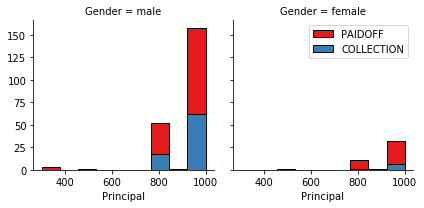

In [8]:
import seaborn as sns

bins = np.linspace(df.Principal.min(), df.Principal.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'Principal', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

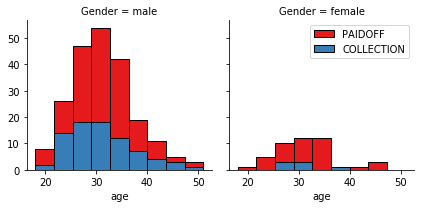

In [9]:
bins = np.linspace(df.age.min(), df.age.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'age', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

# Pre-processing:  Feature selection/extraction

### Lets look at the day of the week people get the loan 

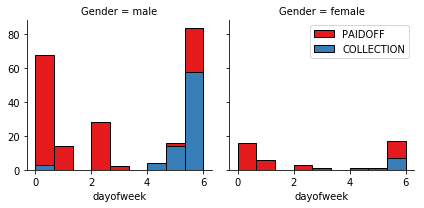

In [10]:
df['dayofweek'] = df['effective_date'].dt.dayofweek
bins = np.linspace(df.dayofweek.min(), df.dayofweek.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'dayofweek', bins=bins, ec="k")
g.axes[-1].legend()
plt.show()


We see that people who get the loan at the end of the week dont pay it off, so lets use Feature binarization to set a threshold values less then day 4 

### Let's take a look on month people get the loan

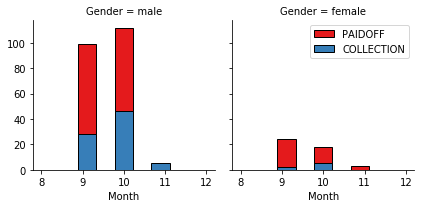

In [11]:
df['Month'] = df.due_date.dt.month
bins = np.linspace(df.Month.min()-1, df.Month.max()+1, 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'Month', bins=bins, ec="k")
g.axes[-1].legend()
plt.show()

there's a higher possibility that people paid off their loan on 9th month than 10th month or later .

In [12]:
df['weekend'] = df['dayofweek'].apply(lambda x: 1 if (x>3)  else 0)
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,Month,weekend
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male,3,10,0
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female,3,10,0
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male,3,9,0
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female,4,10,1
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male,4,10,1


## Convert Categorical features to numerical values

Lets look at gender:

In [13]:
df.groupby(['Gender'])['loan_status'].value_counts(normalize=True)

Gender  loan_status
female  PAIDOFF        0.865385
        COLLECTION     0.134615
male    PAIDOFF        0.731293
        COLLECTION     0.268707
Name: loan_status, dtype: float64

86 % of female pay there loans while only 73 % of males pay there loan


Lets convert male to 0 and female to 1:


In [14]:
df['Gender'].replace(to_replace=['male','female'], value=[0,1],inplace=True)
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,Month,weekend
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,0,3,10,0
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,1,3,10,0
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,0,3,9,0
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,1,4,10,1
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,0,4,10,1


### We can count remaining days for loan. But it's just optional not necessary for our model.

In [15]:
df['remaining_time'] = df['due_date'] - df['effective_date']
df['remaining_time'] = df['remaining_time'].dt.days
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,Month,weekend,remaining_time
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,0,3,10,0,29
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,1,3,10,0,29
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,0,3,9,0,14
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,1,4,10,1,29
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,0,4,10,1,29


## One Hot Encoding  
#### How about education?

In [16]:
df.groupby(['education'])['loan_status'].value_counts(normalize=True)

education             loan_status
Bechalor              PAIDOFF        0.750000
                      COLLECTION     0.250000
High School or Below  PAIDOFF        0.741722
                      COLLECTION     0.258278
Master or Above       COLLECTION     0.500000
                      PAIDOFF        0.500000
college               PAIDOFF        0.765101
                      COLLECTION     0.234899
Name: loan_status, dtype: float64

#### 'Master or Above' catagory has only 2 people one of them has paid off and another one hasn't .This can't help much for better result .So we will drop it

In [17]:
len(df[df.education=='Master or Above'])

2

#### Use one hot encoding technique to conver categorical varables to binary variables and append them to the feature Data Frame 

In [18]:
Feature = df[['Principal','terms','age','Gender','weekend', 'dayofweek']]
Feature = pd.concat([Feature,pd.get_dummies(df['education'])], axis=1)
Feature.drop(['Master or Above'], axis = 1,inplace=True)
Feature.head()

,Principal,terms,age,Gender,weekend,dayofweek,Bechalor,High School or Below,college
0,1000,30,45,0,0,3,0,1,0
1,1000,30,33,1,0,3,1,0,0
2,1000,15,27,0,0,3,0,0,1
3,1000,30,28,1,1,4,0,0,1
4,1000,30,29,0,1,4,0,0,1


### Feature selection

Lets defind feature sets, X:

In [19]:
X = Feature
X[0:5]

,Principal,terms,age,Gender,weekend,dayofweek,Bechalor,High School or Below,college
0,1000,30,45,0,0,3,0,1,0
1,1000,30,33,1,0,3,1,0,0
2,1000,15,27,0,0,3,0,0,1
3,1000,30,28,1,1,4,0,0,1
4,1000,30,29,0,1,4,0,0,1


### Our Labels are ..
#### We will encode them as 0 and 1

In [20]:
y = df['loan_status'].replace(to_replace=['PAIDOFF','COLLECTION'], value=[0,1]).values
y[0:5]

array([0, 0, 0, 0, 0])

## Normalize Data 

Data Standardization give data zero mean and unit variance (technically should be done after train test split )

In [21]:
X= preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:1: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  if __name__ == '__main__':


array([[ 0.51578458,  0.92071769,  2.33152555, -0.42056004, -1.20577805,
        -0.26122054, -0.38170062,  1.13639374, -0.86968108],
       [ 0.51578458,  0.92071769,  0.34170148,  2.37778177, -1.20577805,
        -0.26122054,  2.61985426, -0.87997669, -0.86968108],
       [ 0.51578458, -0.95911111, -0.65321055, -0.42056004, -1.20577805,
        -0.26122054, -0.38170062, -0.87997669,  1.14984679],
       [ 0.51578458,  0.92071769, -0.48739188,  2.37778177,  0.82934003,
         0.12175534, -0.38170062, -0.87997669,  1.14984679],
       [ 0.51578458,  0.92071769, -0.3215732 , -0.42056004,  0.82934003,
         0.12175534, -0.38170062, -0.87997669,  1.14984679]])

In [22]:
from sklearn import metrics
from sklearn.metrics import jaccard_similarity_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss
from sklearn.model_selection import cross_val_score

#### We will use full dataset as '_train'for improving our model accuracy

In [23]:
X_train , y_train = X, y

#### a dictionary as 'acc_scores' for keeping all classification accuracy data

In [24]:
train_scores={}

# Classification 

Now, it is your turn, use the training set to build an accurate model. Then use the test set to report the accuracy of the model
You should use the following algorithm:
- K Nearest Neighbor(KNN)
- Decision Tree
- Support Vector Machine
- Logistic Regression



__ Notice:__ 
- You can go above and change the pre-processing, feature selection, feature-extraction, and so on, to make a better model.
- You should use either scikit-learn, Scipy or Numpy libraries for developing the classification algorithms.
- You should include the code of the algorithm in the following cells.

# K Nearest Neighbor(KNN)
Notice: You should find the best k to build the model with the best accuracy.  
**warning:** You should not use the __loan_test.csv__ for finding the best k, however, you can split your train_loan.csv into train and test to find the best __k__.

#### We will use Cross Validation Score for better Accuracy result

In [25]:
from sklearn.neighbors import KNeighborsClassifier
best_score = 0.00
acc_list = []
for i in range(1, 12):
    Knn = KNeighborsClassifier(n_neighbors=i,algorithm='auto')
    scores = cross_val_score(Knn, X, y, cv=10)
    score=scores.mean()
    acc_list.append(score)
    if score > best_score:
        best_score = score
        clasf_K = Knn
        best_K = i
print("best score for cross validation =",best_score,"  best K =",best_K)
acc_list

best score for cross validation = 0.7522689075630252   best K = 8


[0.6634453781512605,
 0.7118487394957983,
 0.6836974789915965,
 0.7435294117647059,
 0.7122689075630252,
 0.7291596638655462,
 0.7323529411764705,
 0.7522689075630252,
 0.723781512605042,
 0.7262184873949579,
 0.6979831932773108]

In [26]:
clasf_K.fit(X_train , y_train)
train_scores['KNN-Jaccard Score'] = jaccard_similarity_score(y_train, clasf_K.predict(X_train))
train_scores['KNN-f1 Score'] = f1_score(y_train, clasf_K.predict(X_train), average='weighted')
train_scores

{'KNN-Jaccard Score': 0.7947976878612717, 'KNN-f1 Score': 0.7701843558681992}

#### Let's plot our accuracy result for K 

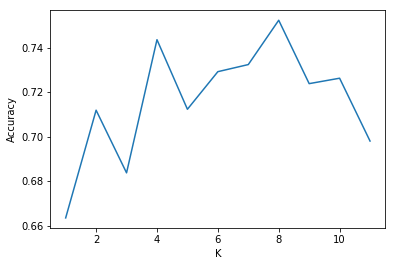

In [27]:
plt.plot(range(1,12), acc_list)
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.show()

# Decision Tree

In [28]:
!pip install pydotplus
!pip install graphviz
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
import pydotplus
import graphviz
import matplotlib.image as mpimg
%matplotlib inline

In [29]:
clasf_tree = DecisionTreeClassifier()
clasf_tree = clasf_tree.fit(X_train, y_train)

In [30]:
train_scores['Tree-Jaccard Score'] = jaccard_similarity_score(y_train, clasf_tree.predict(X_train))
train_scores['Tree-f1 Score'] = f1_score(y_train, clasf_tree.predict(X_train), average='weighted')
train_scores

{'KNN-Jaccard Score': 0.7947976878612717,
 'KNN-f1 Score': 0.7701843558681992,
 'Tree-Jaccard Score': 0.9277456647398844,
 'Tree-f1 Score': 0.924927020820985}

### Let's visualize the Decision Tree !!

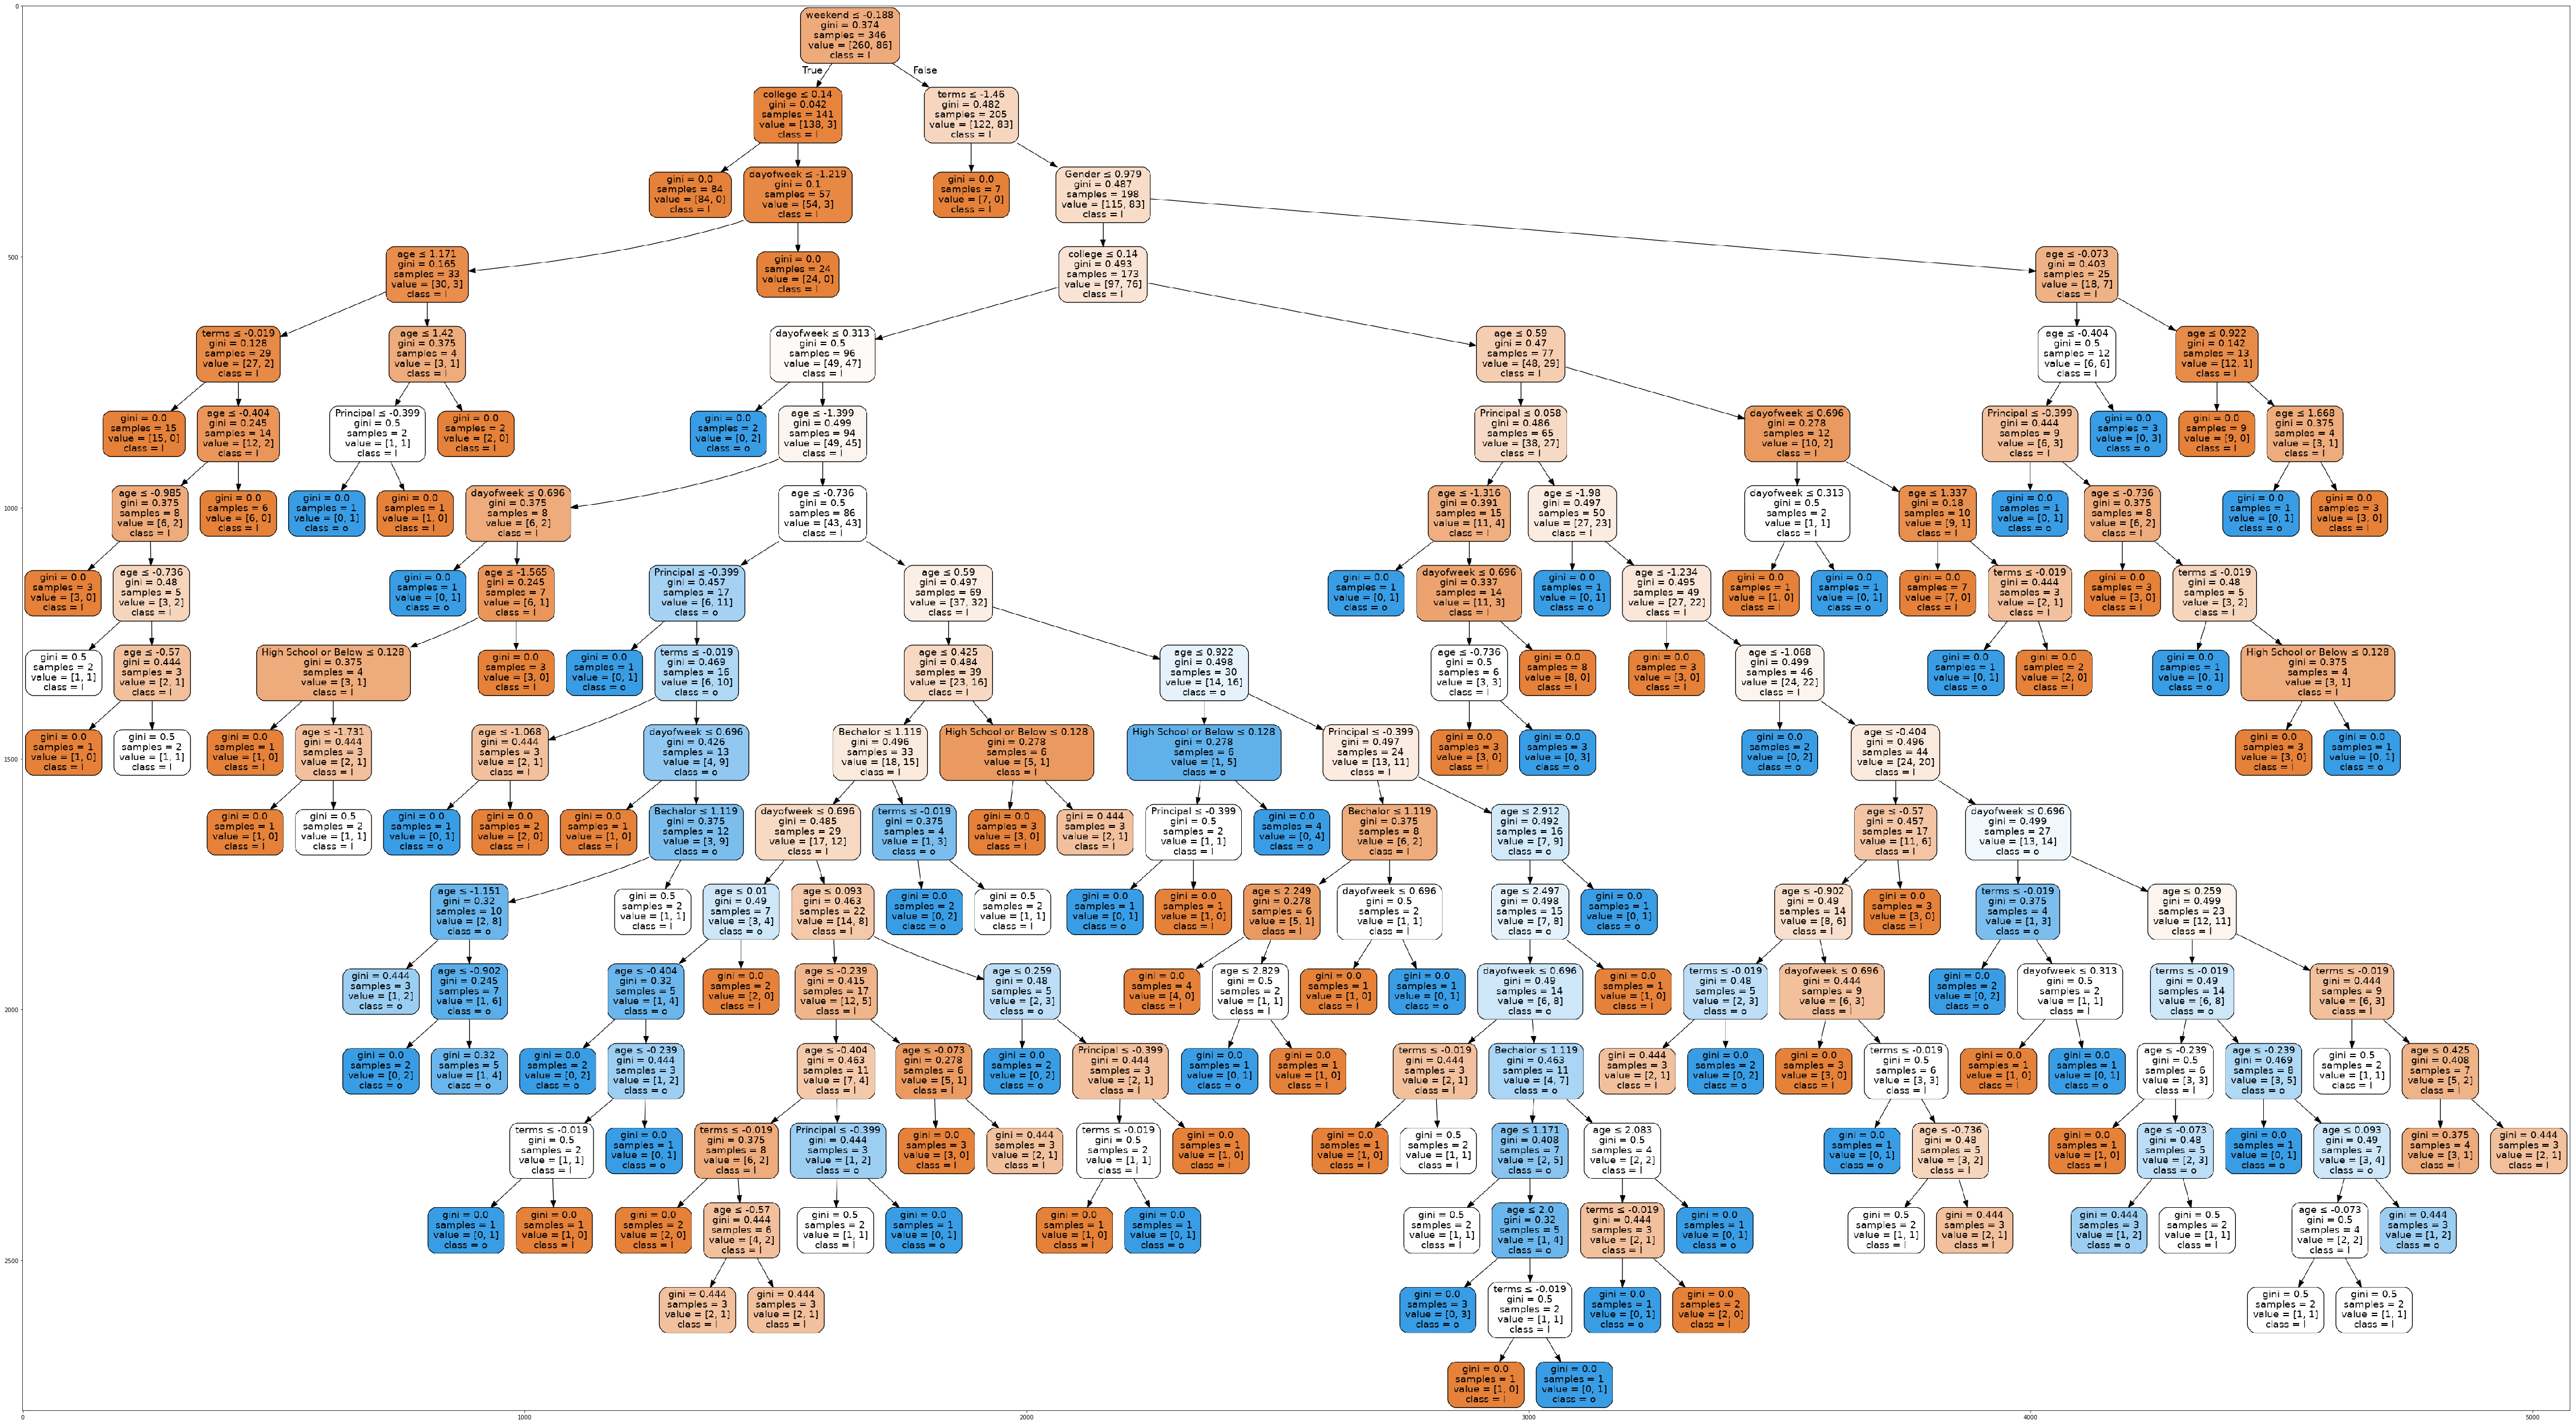

In [31]:
featurenames = Feature.columns[0:9]
data_dot = tree.export_graphviz(clasf_tree, out_file=None, feature_names=featurenames, class_names='loan_status', filled=True, rounded=True, special_characters=True)
graph = pydotplus.graph_from_dot_data(data_dot)
graph.write_png('clasf_tree')
img = mpimg.imread('clasf_tree')
plt.figure(figsize=(80, 160))
plt.imshow(img, interpolation='nearest')

# Support Vector Machine

In [32]:
from sklearn import svm

In [33]:
y_train = y_train.astype(float)
clasf_svm = svm.SVC(kernel='rbf', random_state=9)
clasf_svm.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=9,
  shrinking=True, tol=0.001, verbose=False)

In [34]:
train_scores['SVM-Jaccard Score'] = jaccard_similarity_score(y_train, clasf_svm.predict(X_train))
train_scores['SVM-f1 Score'] = f1_score(y_train, clasf_svm.predict(X_train), average='weighted')
train_scores

{'KNN-Jaccard Score': 0.7947976878612717,
 'KNN-f1 Score': 0.7701843558681992,
 'Tree-Jaccard Score': 0.9277456647398844,
 'Tree-f1 Score': 0.924927020820985,
 'SVM-Jaccard Score': 0.7687861271676301,
 'SVM-f1 Score': 0.683672614559772}

# Logistic Regression

In [35]:
from sklearn.linear_model import LogisticRegression

In [36]:
clasf_logR = LogisticRegression(random_state=0, C=0.01, solver='liblinear').fit(X_train,y_train)

In [37]:
train_scores['Log_Re-jaccard score'] = jaccard_similarity_score(y_train, clasf_logR.predict(X_train))
train_scores['Log_R-f1 score'] = f1_score(y_train, clasf_logR.predict(X_train), average='weighted')
train_scores['Log_R-log loss'] = log_loss(y_train, clasf_logR.predict_proba(X_train))

In [38]:
train_scores

{'KNN-Jaccard Score': 0.7947976878612717,
 'KNN-f1 Score': 0.7701843558681992,
 'Tree-Jaccard Score': 0.9277456647398844,
 'Tree-f1 Score': 0.924927020820985,
 'SVM-Jaccard Score': 0.7687861271676301,
 'SVM-f1 Score': 0.683672614559772,
 'Log_Re-jaccard score': 0.7398843930635838,
 'Log_R-f1 score': 0.7245317827177739,
 'Log_R-log loss': 0.532651170007512}

# Model Evaluation using Test set

In [39]:
from sklearn.metrics import jaccard_similarity_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss

First, download and load the test set:

In [40]:
!wget -O loan_test.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_test.csv

--2020-06-11 12:46:38--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_test.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3642 (3.6K) [text/csv]
Saving to: ‘loan_test.csv’

100%[======================================>] 3,642       --.-K/s   in 0s      

2020-06-11 12:46:38 (352 MB/s) - ‘loan_test.csv’ saved [3642/3642]



### Load Test set for evaluation 

In [41]:
test_df = pd.read_csv('loan_test.csv')
test_df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,1,1,PAIDOFF,1000,30,9/8/2016,10/7/2016,50,Bechalor,female
1,5,5,PAIDOFF,300,7,9/9/2016,9/15/2016,35,Master or Above,male
2,21,21,PAIDOFF,1000,30,9/10/2016,10/9/2016,43,High School or Below,female
3,24,24,PAIDOFF,1000,30,9/10/2016,10/9/2016,26,college,male
4,35,35,PAIDOFF,800,15,9/11/2016,9/25/2016,29,Bechalor,male


In [42]:
test_df['due_date'] = pd.to_datetime(test_df['due_date'])
test_df['effective_date'] = pd.to_datetime(test_df['effective_date'])
test_df['dayofweek'] = test_df['effective_date'].dt.dayofweek
test_df['weekend'] = test_df['dayofweek'].apply(lambda x: 1 if (x>3) else 0)
test_df['Gender'].replace(to_replace=['male','female'], value=[0,1],inplace=True)
# test_df['loan_status'].replace(to_replace=['PAIDOFF','COLLECTION'], value=[0,1], inplace = True)
features = test_df[['Principal','terms','age','Gender','weekend','dayofweek']]
features = pd.concat([features,pd.get_dummies(test_df['education'])], axis=1)
features.drop(['Master or Above'], axis = 1,inplace=True)
X = features
y = test_df['loan_status'].replace(to_replace=['PAIDOFF','COLLECTION'], value=[0,1]).values
test_Y = y.astype(float)
test_X = preprocessing.StandardScaler().fit_transform(X)

# a dictionary for saving test accuracy scores
test_scores={}

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [43]:
# KNN
test_scores['KNN-Jaccard Score'] = jaccard_similarity_score(test_Y, clasf_K.predict(test_X))
test_scores['KNN-f1 Score'] = f1_score(test_Y, clasf_K.predict(test_X), average='weighted')

# Decision Tree
test_scores['Tree-Jaccard Score'] = jaccard_similarity_score(test_Y, clasf_tree.predict(test_X))
test_scores['Tree-f1 Score'] = f1_score(test_Y, clasf_tree.predict(test_X), average='weighted')

# Support vector Machine
test_scores['SVM-Jaccard Score'] = jaccard_similarity_score(test_Y, clasf_svm.predict(test_X))
test_scores['SVM-f1 Score'] = f1_score(test_Y, clasf_svm.predict(test_X), average='weighted')

# logistic regression
test_scores['Log_Re-jaccard score'] = jaccard_similarity_score(test_Y, clasf_logR.predict(test_X))
test_scores['Log_R-f1 score'] = f1_score(test_Y, clasf_logR.predict(test_X), average='weighted')
test_scores['Log_R-log loss'] = log_loss(test_Y, clasf_logR.predict_proba(test_X))

#### Test accuracy scores 

In [44]:
test_scores

{'KNN-Jaccard Score': 0.7407407407407407,
 'KNN-f1 Score': 0.7144311330357843,
 'Tree-Jaccard Score': 0.7407407407407407,
 'Tree-f1 Score': 0.7460588793922127,
 'SVM-Jaccard Score': 0.7222222222222222,
 'SVM-f1 Score': 0.6212664277180406,
 'Log_Re-jaccard score': 0.7592592592592593,
 'Log_R-f1 score': 0.7144140000438048,
 'Log_R-log loss': 0.5527387728738927}

#### Train accuracy scores

In [45]:
train_scores

{'KNN-Jaccard Score': 0.7947976878612717,
 'KNN-f1 Score': 0.7701843558681992,
 'Tree-Jaccard Score': 0.9277456647398844,
 'Tree-f1 Score': 0.924927020820985,
 'SVM-Jaccard Score': 0.7687861271676301,
 'SVM-f1 Score': 0.683672614559772,
 'Log_Re-jaccard score': 0.7398843930635838,
 'Log_R-f1 score': 0.7245317827177739,
 'Log_R-log loss': 0.532651170007512}

# Report


| Algorithm          | Jaccard | F1-score | LogLoss |
|--------------------|---------|----------|---------|
| KNN                | 0.7407  | 0.7144   | NA      |
| Decision Tree      | 0.7407  | 0.7460   | NA      |
| SVM                | 0.7222  | 0.6212   | NA      |
| LogisticRegression | 0.7592  | 0.7144   | 0.5527  |


### It's Logistic-Regression, which is showing out_performs for test-dataset when decision Tree had shown relatively good result for training data-set 